# Final Project: C-N Methods on Options Pricing & IV Estimation

-Background: Black Scholes Equation:

The Black-Scholes equation is a partial differential equation, which 
describes the price of an option over time. The key insight behind the 
equation is that one can perfectly hedge the option by 
buying and selling the underlying asses and the "bank account 
asset" (cash) in just the right way to eliminate risk.

\begin{equation}
    \frac{\partial V}{\partial t}
    + \frac{1}{2}S^2\sigma^2\frac{\partial^2 V}{\partial S^2}
    + (r - D)S\frac{\partial V}{\partial S} - r V = 0
\end{equation}

Here $V(S, T)$ is the value of the options, $S$ is the price of the 
underlying asset, $\sigma$ is the volatility of the underlying asset,
$r$ is the "risk-free" interest rate, and $D$ is the yield
(dividend paying rate) of the underlying stock.

The volatility $\sigma$ stems from an underlying assumption that 
the stock moves like a geometric Brownian motion,
\begin{equation}
    \frac{dS}{S} = \mu dt + \sigma dW.
\end{equation}

Explicit solutions for the Black-Scholes equation,
called The Black-Scholes formulae, are known only for 
European call and put options. For other derivatives, such 
a formula doest not have to exist. However, a numerical solution is 
always possible. (Source: http://compphysics.github.io/ComputationalPhysics/doc/Projects/2020/Project5/BlackScholes/pdf/BlackScholes.tex)






*Introduction*
The market data of AAPL American put options are collected. The reason why we use put options' data for this project is that its value can have a difference in exercise value compared to its European counterparts, and in this way we can not plug analytical solutions of B-S to the answer and need to solve it numerically. We want to use finite element methods on time-dependent PDEs to transform Black-Scholes formula into its PDE form, and solve it to derive the implied volatility of each option contract on different expiration dates.

- We model stock price as a geometric Brownian Motion:
$$S_t = S_{t - \Delta t} \cdot \exp \left(\left(r - \frac{\sigma^2}{2} \right)\Delta t + \sigma \sqrt{\Delta t} W \right)$$
- Then the boundary condition for a contract with payoff max(K-S,0) at T is:
$$\begin{equation} P(0,t) = K\\ P(S,T) = max (K-S,0)  \end{equation}$$
- If we are to exercise contract at any t, the payoff is: $$\begin{equation} g(S,t) = max (K-S,0) \end{equation}$$

- Then we model the value of the put with respect to GBM assumption and dividend rate q:
\begin{equation}
	\frac{\partial \mathrm P}{ \partial \mathrm t } + \frac{1}{2}\sigma^{2} \mathrm S^{2} \frac{\partial^{2} \mathrm P}{\partial \mathrm P^2} + \mathrm (r-q) \mathrm S \frac{\partial \mathrm P}{\partial \mathrm S}\ =\mathrm (r-q) \mathrm P \label{eq:1}
\end{equation}

-Implicit discretization
    The discretized equation becomes with the forward difference method : with a transformed r=(r-q)

 $$ \begin{equation}
    \frac{P^{n+1}_{i} -P^{n}_{i}}{\Delta t} + (r-\frac{1}{2}\sigma^2) \frac{P^{n}_{i+1} -P^{n}_{i-1}}{ 2 \Delta x} + \frac{1}{2} \sigma^2 \frac{P^{n}_{i+1} + P^{n}_{i-1} - 2 P^{n}_{i}}{\Delta x^2}  - r P^{n}_i = 0
    \end{equation}$$

Rearranging the terms: 

\begin{equation}
    P^{n+1}_{i} = P^{n}_{i} \biggl( 1 + r\Delta t + \sigma^2 \frac{\Delta t}{\Delta x^2} \biggr) 
    + P^{n}_{i+1} \biggl( -(r -\frac{1}{2}\sigma^2)\frac{\Delta t}{2 \Delta x} - 
    \frac{1}{2}\sigma^2 \frac{\Delta t}{\Delta x^2}  \biggr) 
     + P^{n}_{i-1} \biggl( (r -\frac{1}{2}\sigma^2)\frac{\Delta t}{2 \Delta x} - 
    \frac{1}{2}\sigma^2 \frac{\Delta t}{\Delta x^2}  \biggr).
\end{equation}


 We can rename the coefficients such that:   
\begin{equation}
   P^{n+1}_{i} = a P^{n}_{i-1} + b P^{n}_{i} + c P^{n}_{i+1}
  \end{equation}
  
  
But then the issue rises: We do not know true $\sigma$ yet, so in order to infer the implied volatility  $\sigma$, we need to first have a maximum likelihood estimator $\sigma^*$ to calculate the otpion price. Then we can estimate true sigma by comparing the value of the estimated option price to the value of real price in the market. In this case, the maximum likelihood estimator is the 30-day historial volaitlity of the stock AAPL. With a simple bisection method, we can estimate $\sigma$ pretty accruately.

Algorithm: 
To find out put value at t, we implemented a CN algorithm to find the contract's value at each S, we considered extreme situations and then use a linear interpolant to calculate the contract's value at current S. Since we only know the put's terminal/boundary value, the algorithm considers the put value based on time T and then adjust to every dt. During each dt step, the CN method is performed to adjust to dS  and calculate X value. With some empirical insights from the Numeical Financial Mathematics Textbook, the k_l is set to 1.2. At each t, each S in the simulated price range, the contract X value is then determined by comparing exercising the put or hold it for another interval. After T is deducted to 0 (current time), the contract value array X with a corresponding S array for price range can be interpolated with the current stock price $S_t$. Then the put value given a historical volatility is calculated. This price is compared to the market price for determining true implied volatility for each contract with a simple bisection method with f= the algorithm with a variable  $\sigma$. 


total options in sample: 73
number of options calculated:0
number of options calculated:1
number of options calculated:2
number of options calculated:3
number of options calculated:4
number of options calculated:5
number of options calculated:6
number of options calculated:7
number of options calculated:8
number of options calculated:9
number of options calculated:10
number of options calculated:11
number of options calculated:12
number of options calculated:13
number of options calculated:14
number of options calculated:15
number of options calculated:16
number of options calculated:17
number of options calculated:18
number of options calculated:19
number of options calculated:20
number of options calculated:21
number of options calculated:22
number of options calculated:23
number of options calculated:24
number of options calculated:25
number of options calculated:26
number of options calculated:27
number of options calculated:28
number of options calculated:29
number of options calc

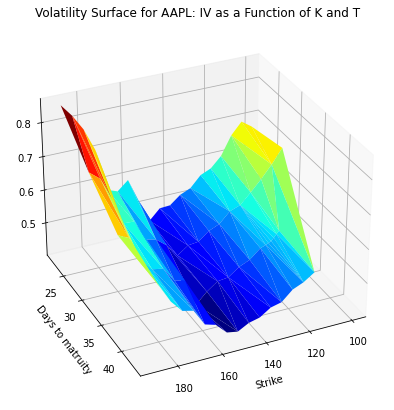

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
from itertools import chain
import datetime
from dateutil import parser


def calcT(d1, d2):
    date1 = parser.parse(d1)
    date2 = parser.parse(d2)
    diff = date2 - date1
    t=(diff.days/365)
    return t, diff.days

d1="2022-05-12"    
df = pd.read_csv("aapl_df.csv" ) #aapl option data for June expiration

def calcprice(df):
    if df['Volume'].iloc[0]== 21369: #mark modified csv to improve efficiency
        return 0
    price=[]
    und=[]
    div=[]
    r=[]
    hisvol=[]
    time=[]
    day=[]
    for i in range(len(df)):
            mid=(df['Bid'].iloc[i]+df['Ask'].iloc[i])/2
            price.append(mid)
            und.append(143.8)
            div.append(0.0065)
            r.append(0.0256)
            hisvol.append(0.4463)
            time.append(calcT(d1,df['Expdate'].iloc[i])[0])
            day.append(calcT(d1,df['Expdate'].iloc[i])[1])
    df['price']=pd.DataFrame(price)
    df['und']=pd.DataFrame(und)
    df['div']=pd.DataFrame(div)
    df['r']=pd.DataFrame(r)
    df['hisvol']=pd.DataFrame(hisvol)
    df['day']=pd.DataFrame(day)
    df['T']=pd.DataFrame(time)
    df['Volume'].iloc[0]= 21369
    return 0

calcprice(df)
def bisection(f, a, b, tol=1e-3, maxiter=100):
    c = (a+b)*0.5  # Declare c as the midpoint ab
    n = 0  
    while n <= maxiter:
        c = (a+b)*0.5
        if f(c) == 0 or abs(a-b)*0.5 < tol:
            # Root is found or is very close
            return c
        n += 1
        if f(c) < 0:
            a = c
        else:
            b = c                
    return c
 # 3 times per trading day dt 
class Option:
    def __init__(self, r, div, vol, K, T,N,dt,realP):
        self.K = K
        self.T = T         
        self.Smax = 3 * K  #maximum range for stock move 
        self.N = N   #steps 
        self.dt = dt  
        self.S = np.linspace(0, self.Smax, self.N)  #delta x in this case 
        self.A = np.zeros((self.N, self.N))  
        self.b = np.zeros((self.N, 1))
        self.X = np.maximum(self.K - self.S, 0) # payoff of exercising the option 
        self.r = r   
        self.q = div
        self.sigma = vol  
        self.price=realP
        self.tol = 1e-5
        self.kl = 1.2
        self.err = 0
        self.iter = 0

    def solve(self, S0,vol):
        self.solvePDE(vol)
        x = self.S.flatten()
        y = self.X.flatten()
        return np.interp(S0, x, y)

    def solvePDE(self,vol):
        t = self.T
        while t > 0:
            dt = min(t, self.dt)
            self.setCoeff(dt,vol)
            self.solveCN()
            t -= dt

    def setCoeff(self, dt,vol):
        N = self.N
        r = self.r
        q = self.q
        S = self.S
        X = self.X
        sigma = vol
        dS = S[1] - S[0]
        for i in range(0, N-1):
            alpha = 0.25 * dt * (np.square(sigma*S[i]/dS) - (r - q) * S[i]/dS)
            beta = 0.5 * dt * (r + np.square(sigma * S[i]/dS))
            gamma = 0.25 * dt * (np.square(sigma*S[i]/dS) + (r - q) * S[i]/dS)
            if i == 0:
                self.b[i] = X[i] * (1 - beta)
                self.A[i][i] = 1 + beta
            else:
                self.b[i] = alpha * X[i-1] + (1 - beta) * X[i] + gamma * X[i+1]
                self.A[i][i-1] = -alpha
                self.A[i][i] = 1 + beta
                self.A[i][i+1] = -gamma
        self.A[-1][N-4] = -1
        self.A[-1][N-3] = 4
        self.A[-1][N-2] = -5
        self.A[-1][N-1] = 2
        self.b[-1] = 0


    def solveCN(self):
        N = self.N
        ite = 0
        kl = self.kl
        self.err = 1000
        while self.err > self.tol and ite <= 1000:
            ite += 1
            x_old = self.X.copy()
            for i in range(N-1):
                self.X[i] = (1 - kl) * self.X[i] + kl * self.b[i] / self.A[i][i]
                self.X[i] -= self.A[i][i+1] * self.X[i+1] * kl / self.A[i][i]
                self.X[i] -= self.A[i][i-1] * self.X[i-1] * kl / self.A[i][i]
            self.X[N-1] = (1 - kl) * self.X[i] + kl * self.b[i] / self.A[i][i]  #boundary condition

            for j in range(N-4, N):
                self.X[N-1] -= self.A[N-1][j] * self.X[j] * kl / self.A[N-1][N-1]
          
            self.X = np.maximum(self.X, self.K - self.S) #compare hold to exercise (American option)
            self.err = np.linalg.norm(x_old - self.X)
            self.iter = ite

class impmodel:

    def __init__(self, S0, r, K, T, div, N, price ):
        self.S = S0
        self.r = r
        self.T = T
        self.K=K
        self.div = div
        self.N = N
        self.price=price

    def optionval(self, K, sigma):
        opt = Option(K=self.K, r=self.r, T=self.T, N=self.N, vol=sigma, div=self.div,dt=(1/365),realP=self.price)
        return opt.solve(self.S,sigma)

    def imp_vol(self):
            f = lambda sigma: \
                self.optionval(self.K, sigma)-\
                self.price
            impv = bisection(f, 0.01, 2.0)
            return impv
N=40
dt=(1/365) #1 time a day
div=0.0065 #dividend
r=0.0256 #interest rate
hisvol=0.4463 #historical vol
estimate=[]
err=[]
impvol=[]
strike=df['Strike'].values.tolist()
day=df['day'].values.tolist()
print("total options in sample: 73")
for i in range(len(df)):
    solver = Option(r, div, hisvol, df['Strike'].iloc[i], df['T'].iloc[i],N,dt,df['price'].iloc[i])
    price = solver.solve(143.8,hisvol)
    impmod=impmodel(143.8, r,df['Strike'].iloc[i], df['T'].iloc[i], div, N, df['price'].iloc[i] )
    impv= impmod.imp_vol()
    print("number of options calculated:" + str(i))
    impvol.append(impv)
    estimate.append(price)

df['estimate']=pd.DataFrame(estimate) # constant vol curve assumption, then use bisection to estimate implied vol

# plot reference:https://medium.com/@rasmus.sparre/plot-volatility-surface-in-python-using-5d8b9ad10de9
# initiate figure
fig = plt.figure(figsize=(7,7))
# set projection to 3d
axs = plt.axes(projection="3d")
# use plot_trisurf from mplot3d to plot surface and cm for color scheme
axs.plot_trisurf(strike, day, impvol, cmap=cm.jet)
# change angle
axs.view_init(30, 65)
# add labels
plt.xlabel("Strike")
plt.ylabel("Days to matruity")
plt.title("Volatility Surface for AAPL: IV as a Function of K and T")
plt.show()


